## Purpose 
First model showed that using TF-IDF vectorizer and NMF decomposition led to the topics that made the most sense. 
Will re-iterate that pipeline only here, and expand analysis, for the us_pops data


In [128]:
import pickle
import numpy as np
import pandas as pd

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.feature_extraction import text

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [7]:
file = open('../../Webscraper/us_pops_raw', 'rb')
us_pops_raw = pickle.load(file)
us_pops_raw = us_pops_raw.dropna().reset_index(drop=True)
us_pops = us_pops_raw['Lyrics']

# only keep alphanumeric, remove newlines, and make everything lowercase
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
rm_newline = lambda x: re.sub("\n", ' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

us_pops_nopunc = us_pops.map(alphanumeric).map(rm_newline).map(punc_lower)

In [8]:
# lemmatize. do this by turning every line into a list of words, and concat back to full lyrics
us_pops_list = us_pops_nopunc.apply(lambda x: x.split(' '))

def lemmatize(list_of_words):
    lmt = WordNetLemmatizer()
    strg = ''
    for word in list_of_words:
        lem_word = lmt.lemmatize(word)
        if len(lem_word) > 2:
            strg += lem_word + ' '
    return strg

us_pops_clean = us_pops_list.apply(lemmatize)

In [9]:
stop_words_added = text.ENGLISH_STOP_WORDS.union(['huh','woo','whoa','hey','hold','really','gotta'])

tfidf =  TfidfVectorizer(
    stop_words = stop_words_added,
    max_df = 0.2,
    min_df = 0.0005
)
Y = tfidf.fit_transform(us_pops_clean)
doc_term_matrix = pd.DataFrame(Y.toarray(), columns=tfidf.get_feature_names())

In [10]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [11]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_term_matrix)

display_topics(nmf_model, tfidf.get_feature_names(), 15)


Topic  0
believe, dream, stay, friend, gone, try, forever, better, true, long, home, wrong, fall, lie, inside

Topic  1
nigga, bitch, shit, fuck, ayy, money, gon, real, bad, lil, hoe, big, hit, fuckin, pussy

Topic  2
tonight, alright, waiting, tomorrow, fight, party, kiss, drink, tight, inside, dancing, touch, boo, end, leave

Topic  3
dance, body, shake, rock, everybody, party, stop, turn, floor, play, music, round, roll, club, beat

Topic  4
remember, used, memory, forget, gave, bring, fell, saying, wish, hurt, walk, bye, picture, sad, century


In [12]:
# topic_word = pd.DataFrame(
#     nmf_model.components_.round(3),
#     columns = tfidf.get_feature_names()
#     )
# topic_word

In [105]:
doc_topic_mat = pd.DataFrame(
    doc_topic.round(3),
    columns = ['dream','hiphop','love','dance','memory']
)

# re-add Song/Artist
doc_topic_mat = doc_topic_mat.join(us_pops_raw[['Song','Artist']])

In [106]:
doc_topic_mat

,dream,hiphop,love,dance,memory,Song,Artist
0,0.061,0.000,0.000,0.011,0.000,Hold On,Wilson Phillips
1,0.064,0.000,0.006,0.007,0.000,It Must Have Been Love,Roxette
2,0.041,0.002,0.000,0.000,0.010,Nothing Compares 2 U,Sinéad O'Connor
3,0.019,0.011,0.002,0.017,0.001,Poison,Bell Biv DeVoe
4,0.000,0.000,0.000,0.080,0.001,Vogue,Madonna
...,...,...,...,...,...,...,...
2666,0.052,0.000,0.000,0.001,0.076,Eyes on You,Chase Rice
2667,0.040,0.000,0.006,0.056,0.000,All to Myself,Dan + Shay
2668,0.022,0.006,0.003,0.011,0.000,Boyfriend,Ariana Grande and Social House
2669,0.056,0.004,0.132,0.000,0.000,Walk Me Home,Pink


In [107]:
doc_topic_mat.sort_values('dream',ascending=False).head(20)

,dream,hiphop,love,dance,memory,Song,Artist
657,0.143,0.015,0.000,0.038,0.024,"Foolish Games"" / ""You Were Meant for Me",Jewel
583,0.112,0.035,0.002,0.060,0.015,"Follow You Down"" / ""Til I Hear It from You",Gin Blossoms
1370,0.112,0.000,0.001,0.002,0.000,We Belong Together,Mariah Carey
1993,0.107,0.004,0.033,0.000,0.000,Some Nights,Fun
913,0.107,0.015,0.001,0.003,0.000,Satisfy You,Puff Daddy featuring R. Kelly
215,0.105,0.000,0.000,0.000,0.012,Sometimes Love Just Ain't Enough,Patty Smyth and Don Henley
2002,0.105,0.000,0.002,0.000,0.002,Take Care,Drake featuring Rihanna
785,0.104,0.000,0.000,0.000,0.000,The Arms of the One Who Loves You,Xscape
606,0.103,0.000,0.001,0.000,0.000,Anything,3T
1699,0.100,0.027,0.000,0.068,0.014,Burnin' Up,Jonas Brothers featuring Big Rob


In [108]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(doc_topic_mat.iloc[:,:5])
    Sum_of_squared_distances.append(km.inertia_)

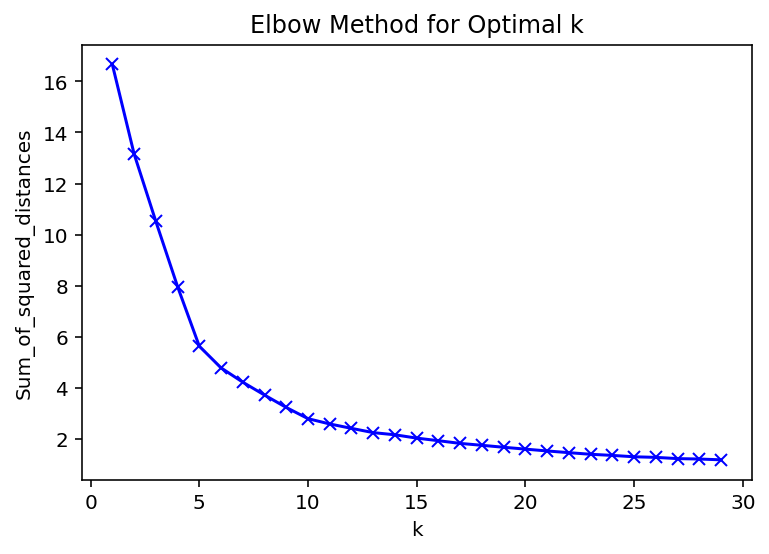

In [109]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

### 10 seems optimal, or maybe 5

In [36]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Load in the data
df = doc_topic_mat.iloc[:,:5]

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_std)

x_pca = pca.transform(X_std)

In [138]:
labels = modelkmeans.fit_predict(doc_topic_mat.iloc[:,:5])

In [137]:
modelkmeans = KMeans(n_clusters = 10)
hello = modelkmeans.fit(doc_topic_mat.iloc[:,:5])

In [139]:
doc_topic_mat['cluster'] = labels

In [140]:
doc_topic_mat

,dream,hiphop,love,dance,memory,Song,Artist,cluster
0,0.061,0.000,0.000,0.011,0.000,Hold On,Wilson Phillips,0
1,0.064,0.000,0.006,0.007,0.000,It Must Have Been Love,Roxette,0
2,0.041,0.002,0.000,0.000,0.010,Nothing Compares 2 U,Sinéad O'Connor,0
3,0.019,0.011,0.002,0.017,0.001,Poison,Bell Biv DeVoe,1
4,0.000,0.000,0.000,0.080,0.001,Vogue,Madonna,4
...,...,...,...,...,...,...,...,...
2666,0.052,0.000,0.000,0.001,0.076,Eyes on You,Chase Rice,9
2667,0.040,0.000,0.006,0.056,0.000,All to Myself,Dan + Shay,4
2668,0.022,0.006,0.003,0.011,0.000,Boyfriend,Ariana Grande and Social House,1
2669,0.056,0.004,0.132,0.000,0.000,Walk Me Home,Pink,6


In [144]:
doc_topic_mat.groupby(['cluster']).mean()*100

,dream,hiphop,love,dance,memory
cluster,,,,,
0,5.998305,0.446489,0.333293,0.613075,0.480387
1,2.451111,0.938942,0.360741,1.326455,0.281905
2,0.350000,0.042857,0.450000,0.178571,43.107143
3,0.514286,19.928571,0.140260,0.888312,0.185714
4,2.006471,1.517059,0.638235,6.547941,0.310882
5,1.076471,0.897059,27.341176,2.179412,0.458824
6,3.363333,0.725556,9.987778,1.822222,0.427778
7,1.526512,9.146512,0.344186,2.148837,0.218140
8,0.485542,0.889157,0.924096,16.906024,0.256627


In [142]:
doc_topic_mat.groupby(['cluster']).count().iloc[:,0]

cluster
0    826
1    945
2     14
3     77
4    340
5     34
6     90
7    215
8     83
9     47
Name: dream, dtype: int64

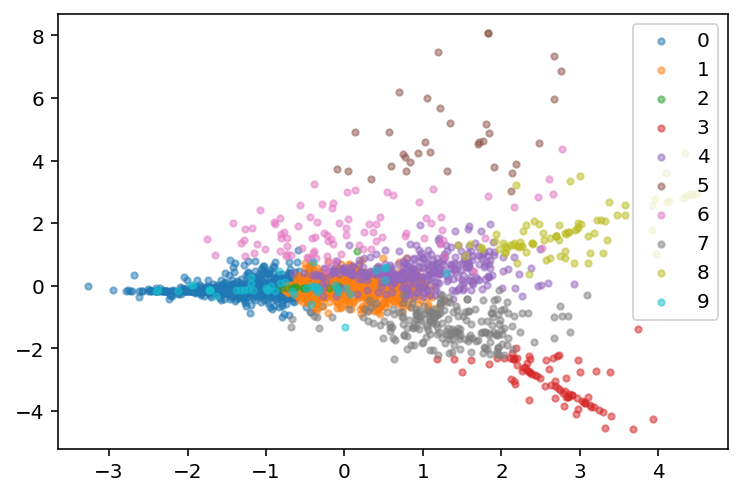

In [143]:
fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(x_pca[:,0][ix], x_pca[:,1][ix], label = g, s = 10 ,alpha = 0.5)
ax.legend()
plt.show()